In [3]:
!pip install pylatexenc

  Using cached pylatexenc-2.10.tar.gz (162 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=87475a8d53886a179112f033e411766d79e4ced961877a18c17eb90fdfb8fb42
  Stored in directory: /home/azhar04/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


In [1]:
from qiskit_algorithms.optimizers import SLSQP
from qiskit.circuit.library import TwoLocal

num_qubits = 2

# ansatz = TwoLocal(num_qubits, "ry", "cz")

entangler_map = [[0, 1], [1, 2], [2,3], [3,0]]  # entangle the first and last two-way
ansatz = TwoLocal(4, 'ry', 'cx', entangler_map, reps=1, skip_final_rotation_layer=True)

optimizer = SLSQP(maxiter=1000)

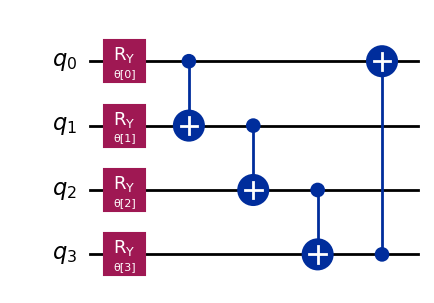

In [2]:
ansatz.decompose().draw('mpl')  # note, that the parameters are the same!

In [3]:
from qiskit.primitives import Estimator

estimator = Estimator()

In [4]:
from qiskit_algorithms import VQE

vqe = VQE(estimator, ansatz, optimizer)

# Complete Example

In [7]:
from qiskit.quantum_info import SparsePauliOp
# H=z1x4+2y0y3
# H2_op = SparsePauliOp.from_list([("XIIZI", 1), 
#                                  ("IYIIY", 2)])

H2_op = SparsePauliOp.from_list(
    [("IIII", -0.0996), 
     ("IIIZ", 0.1711), 
     ("IIZI", 0.1711), 
     ("IZII", -0.2225), 
     ("ZIII", -0.2225), 
     ("IIZZ", 0.1686), 
     ("IZIZ", 0.1205), 
     ("ZIIZ", 0.1658), 
     ("IZZI", 0.1658), 
     ("ZIZI", 0.1205), 
     ("ZZII", 0.1743), 
     ("XYYX", 0.0453), 
     ("YXXY", 0.0453), 
     ("YYXX", -0.0453), 
     ("XXYY", -0.0453)]
)

In [8]:
result = vqe.compute_minimum_eigenvalue(H2_op)
print(result)

{   'aux_operators_evaluated': None,
    'cost_function_evals': 65,
    'eigenvalue': -0.5388999563612347,
    'optimal_circuit': <qiskit.circuit.library.n_local.two_local.TwoLocal object at 0x7fed53d85550>,
    'optimal_parameters': {   ParameterVectorElement(θ[0]): -6.283348025294591,
                              ParameterVectorElement(θ[1]): 3.1414080413466015,
                              ParameterVectorElement(θ[2]): -3.141423822953499,
                              ParameterVectorElement(θ[3]): -0.0009135613850669451},
    'optimal_point': array([-6.28334803e+00,  3.14140804e+00, -3.14142382e+00, -9.13561385e-04]),
    'optimal_value': -0.5388999563612347,
    'optimizer_evals': None,
    'optimizer_result': <qiskit_algorithms.optimizers.optimizer.OptimizerResult object at 0x7fedd4cb53a0>,
    'optimizer_time': 0.37774205207824707}


In [19]:
from qiskit_algorithms.optimizers import SPSA

estimator = Estimator(options={"shots": 10})

vqe.estimator = estimator
vqe.optimizer = SPSA(maxiter=100)
result = vqe.compute_minimum_eigenvalue(operator=H2_op)
print(result)

{   'aux_operators_evaluated': None,
    'cost_function_evals': 200,
    'eigenvalue': -0.4906049865710972,
    'optimal_circuit': <qiskit.circuit.library.n_local.two_local.TwoLocal object at 0x7f7607f3d040>,
    'optimal_parameters': {   ParameterVectorElement(θ[2]): -7.460745829532981,
                              ParameterVectorElement(θ[1]): 6.245489497178305,
                              ParameterVectorElement(θ[0]): 3.2633185050054956,
                              ParameterVectorElement(θ[3]): -3.1495716839615935},
    'optimal_point': array([ 3.26331851,  6.2454895 , -7.46074583, -3.14957168]),
    'optimal_value': -0.4906049865710972,
    'optimizer_evals': None,
    'optimizer_result': <qiskit_algorithms.optimizers.optimizer.OptimizerResult object at 0x7f7607f32120>,
    'optimizer_time': 1.4806199073791504}


In [20]:
from qiskit_algorithms.optimizers import SPSA

estimator = Estimator(options={"shots": 1000})

vqe.estimator = estimator
vqe.optimizer = SPSA(maxiter=100)
result = vqe.compute_minimum_eigenvalue(operator=H2_op)
print(result)

{   'aux_operators_evaluated': None,
    'cost_function_evals': 200,
    'eigenvalue': -0.5382221949526826,
    'optimal_circuit': <qiskit.circuit.library.n_local.two_local.TwoLocal object at 0x7f76077dfa10>,
    'optimal_parameters': {   ParameterVectorElement(θ[2]): 3.1425577412788503,
                              ParameterVectorElement(θ[1]): 3.137298334079316,
                              ParameterVectorElement(θ[0]): 0.002899800271268766,
                              ParameterVectorElement(θ[3]): 0.1498801438731212},
    'optimal_point': array([2.89980027e-03, 3.13729833e+00, 3.14255774e+00, 1.49880144e-01]),
    'optimal_value': -0.5382221949526826,
    'optimizer_evals': None,
    'optimizer_result': <qiskit_algorithms.optimizers.optimizer.OptimizerResult object at 0x7f7607e9e210>,
    'optimizer_time': 1.3503053188323975}


# Noisy

In [11]:
H2_op = SparsePauliOp.from_list(
    [
        ("II", -1.052373245772859),
        ("IZ", 0.39793742484318045),
        ("ZI", -0.39793742484318045),
        ("ZZ", -0.01128010425623538),
        ("XX", 0.18093119978423156),
    ]
)

print(f"Number of qubits: {H2_op.num_qubits}")

Number of qubits: 2


### Reference Value

In [9]:
from qiskit_algorithms import NumPyMinimumEigensolver

numpy_solver = NumPyMinimumEigensolver()
result = numpy_solver.compute_minimum_eigenvalue(operator=H2_op)
ref_value = result.eigenvalue.real
print(f"Reference value: {ref_value:.5f}")

Reference value: -1.13709


In [12]:
# define ansatz and optimizer
from qiskit.circuit.library import TwoLocal
from qiskit_algorithms.optimizers import SPSA

iterations = 125
ansatz = TwoLocal(rotation_blocks="ry", entanglement_blocks="cz")
spsa = SPSA(maxiter=iterations)

In [13]:
# define callback
# note: Re-run this cell to restart lists before training
counts = []
values = []


def store_intermediate_result(eval_count, parameters, mean, std):
    counts.append(eval_count)
    values.append(mean)


# define Aer Estimator for noiseless statevector simulation
from qiskit_algorithms.utils import algorithm_globals
from qiskit_aer.primitives import Estimator as AerEstimator

seed = 170
algorithm_globals.random_seed = seed

noiseless_estimator = AerEstimator(
    run_options={"seed": seed, "shots": 1024},
    transpile_options={"seed_transpiler": seed},
)

In [14]:
# instantiate and run VQE
from qiskit_algorithms import VQE

vqe = VQE(noiseless_estimator, ansatz, optimizer=spsa, callback=store_intermediate_result)
result = vqe.compute_minimum_eigenvalue(operator=H2_op)

print(f"VQE on Aer qasm simulator (no noise): {result.eigenvalue.real:.5f}")
print(f"Delta from reference energy value is {(result.eigenvalue.real - ref_value):.5f}")

VQE on Aer qasm simulator (no noise): -1.13249
Delta from reference energy value is 0.00460


Text(0.5, 1.0, 'Convergence with no noise')

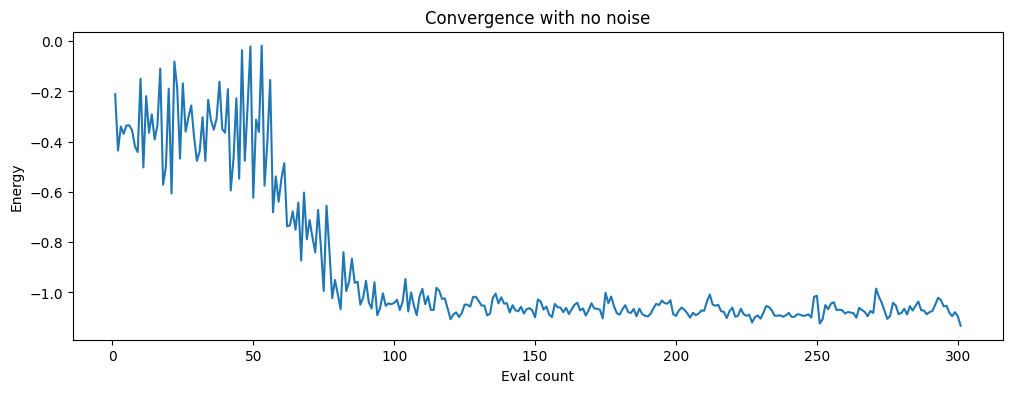

In [15]:
import pylab

pylab.rcParams["figure.figsize"] = (12, 4)
pylab.plot(counts, values)
pylab.xlabel("Eval count")
pylab.ylabel("Energy")
pylab.title("Convergence with no noise")

In [16]:
from qiskit_aer.noise import NoiseModel
from qiskit.providers.fake_provider import GenericBackendV2

coupling_map = [(0, 1), (1, 2), (2, 3), (3, 4)]
device = GenericBackendV2(num_qubits=5, coupling_map=coupling_map, seed=54)

noise_model = NoiseModel.from_backend(device)

print(noise_model)

NoiseModel:
  Basis gates: ['cx', 'delay', 'id', 'measure', 'reset', 'rz', 'sx', 'x']
  Instructions with noise: ['x', 'measure', 'sx', 'cx', 'id']
  Qubits with noise: [0, 1, 2, 3, 4]
  Specific qubit errors: [('cx', (0, 1)), ('cx', (1, 2)), ('cx', (2, 3)), ('cx', (3, 4)), ('id', (0,)), ('id', (1,)), ('id', (2,)), ('id', (3,)), ('id', (4,)), ('sx', (0,)), ('sx', (1,)), ('sx', (2,)), ('sx', (3,)), ('sx', (4,)), ('x', (0,)), ('x', (1,)), ('x', (2,)), ('x', (3,)), ('x', (4,)), ('measure', (0,)), ('measure', (1,)), ('measure', (2,)), ('measure', (3,)), ('measure', (4,))]


In [17]:
noisy_estimator = AerEstimator(
    backend_options={
        "method": "density_matrix",
        "coupling_map": coupling_map,
        "noise_model": noise_model,
    },
    run_options={"seed": seed, "shots": 1024},
    transpile_options={"seed_transpiler": seed},
)

In [18]:
counts = []
values = []

vqe.estimator = noisy_estimator

result1 = vqe.compute_minimum_eigenvalue(operator=H2_op)

print(f"VQE on Aer qasm simulator (with noise): {result1.eigenvalue.real:.5f}")
print(f"Delta from reference energy value is {(result1.eigenvalue.real - ref_value):.5f}")

VQE on Aer qasm simulator (with noise): -1.06230
Delta from reference energy value is 0.07479


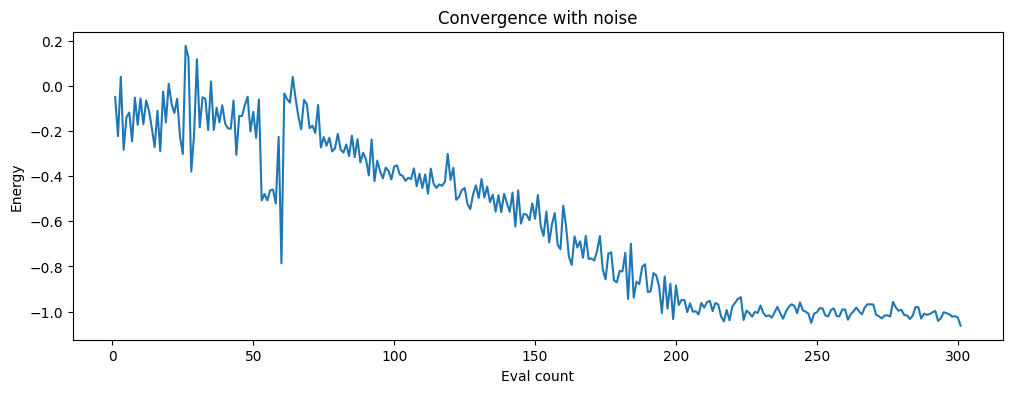

In [19]:
if counts or values:
    pylab.rcParams["figure.figsize"] = (12, 4)
    pylab.plot(counts, values)
    pylab.xlabel("Eval count")
    pylab.ylabel("Energy")
    pylab.title("Convergence with noise")